# Band structure of honeycomb lattice

In [ ]:
# import sys
# root_folder = '../src/1d_ssh/'
# sys.path.insert(1, root_folder)

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import math as m

In [1]:
def R(x,y,x_tab):  
    r = np.linalg.norm(np.subtract(x_tab,np.array([x,y])),axis=1)
    r_min = np.min(r)
   
    p = 8.
    d = .5
    y = -p*np.exp(-r_min**2/d**2)

    return y

def honeycomb_supercell(N): 
    a = 1   # lattice constant of hexagonal lattice
    b = a/m.sqrt(3)
    
    a1 = a*np.array([0.5*m.sqrt(3), 0.5])
    a2 = a*np.array([0.5*m.sqrt(3), -0.5])

    x1 = b*np.array([0, 0]) # for armchair
    x2 = b*np.array([0.5, 0.5*m.sqrt(3)])
    
    x_tab = np.empty((0,2), float)

    for ii in range(N):
        if ii == 0:
            x_tab = np.vstack((x_tab,x1))
            x_tab = np.vstack((x_tab,x2))
        else:
            x_tab = np.vstack((x_tab,x_tab[-2,:] + (ii%2)*a1 + ((ii+1)%2)*a2 ))
            x_tab = np.vstack((x_tab,x_tab[-2,:] + (ii%2)*a2 + ((ii+1)%2)*a1 ))

    return x_tab

def honeycomb_2d(Nx,Ny): 
    a = 1   # lattice constant of hexagonal lattice
    b = a/m.sqrt(3)
    
    a1 = a*np.array([0.5*m.sqrt(3), 0.5])
    a2 = a*np.array([0.5*m.sqrt(3), -0.5])

    x1 = b*np.array([0, 0]) # for armchair
    x2 = b*np.array([0.5, 0.5*m.sqrt(3)])
    
    x_tab = honeycomb_supercell(Nx)
    
    for ii in range(Ny):
        x_shifted = np.add(x_tab, ii*(a1-a2))
        x_tab = np.vstack((x_tab, x_shifted))

    return x_tab 

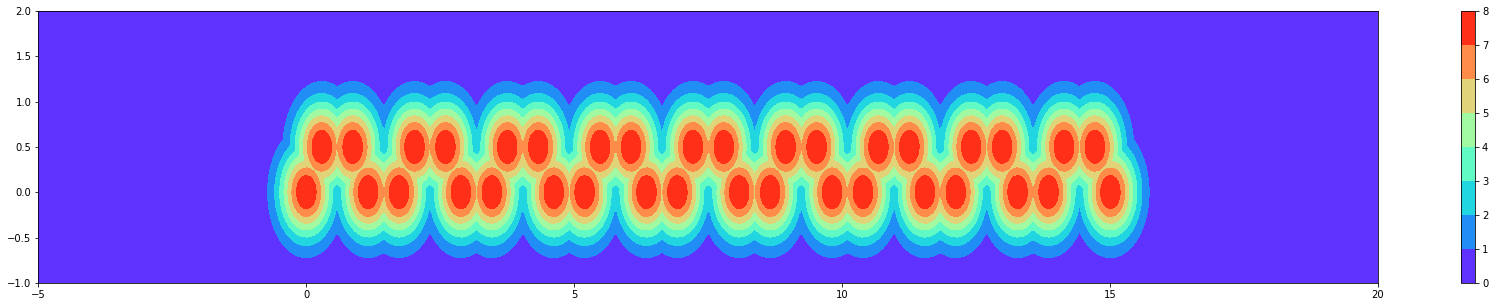

In [ ]:
N = 18 # number of period.

x_tab = honeycomb_supercell(N)

nx = 450
ny = 90
x_ = np.linspace(-5,20, nx)
y_ = np.linspace(-1,2, ny) 
X,Y = np.meshgrid(x_, y_,indexing='ij')

Z = np.empty([nx,ny])

for ii in range(nx):
    for jj in range(ny):
        Z[ii,jj] = R(X[ii,jj],Y[jj,jj],x_tab)

plt.figure(figsize=(30,5))
h = plt.contourf(X, Y, -1*Z, cmap="rainbow")
# plt.axis('scaled')
plt.colorbar()
plt.clim(0,8)
plt.show()

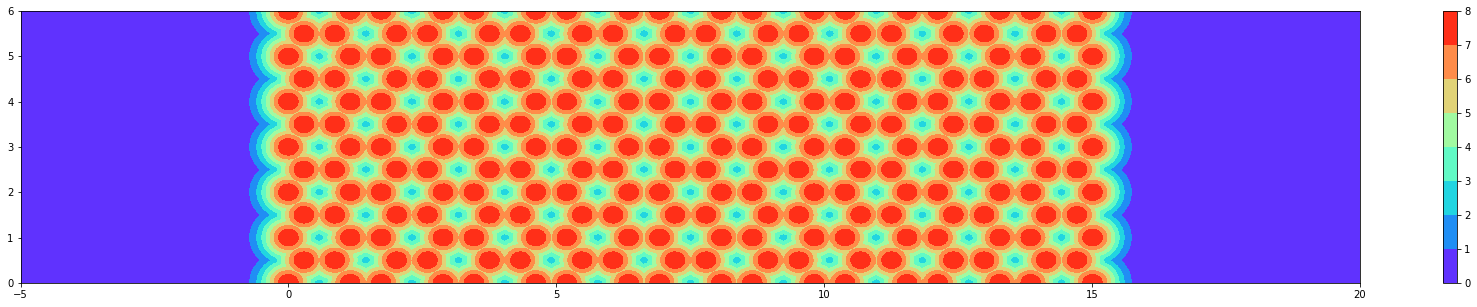

In [8]:
Nx = 18 # number of period.
Ny = 6

x_tab = honeycomb_2d(Nx,Ny)

Nx = 450
Ny = 150
x_ = np.linspace(-5,20, Nx)
y_ = np.linspace(0,6, Ny) 
X,Y = np.meshgrid(x_, y_,indexing='ij')

Z = np.empty([Nx,Ny])

for ii in range(Nx):
    for jj in range(Ny):
        Z[ii,jj] = R(X[ii,jj],Y[jj,jj],x_tab)

plt.figure(figsize=(30,5))
h = plt.contourf(X, Y, -1*Z, cmap="rainbow")

plt.colorbar()
plt.clim(0,8)
plt.show()